
## MED 3

# Regresja wielomianowa

Wczytanie niezbędnych bibliotek


In [2]:
%matplotlib notebook
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os as os
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# 1. Wprowadzenie teoretyczne

Celem regresji wielomianowej jest dopasowanie do danych doświadczalnych/historycznych wykresu funkcji, która oddaje charakter tych danych. 

Zadanie polega na znalezieniu wielomianu $\hat{f}(x)$ postaci:

$$\hat{f}(x)=w_0+w_1 x^1+w_2x^2+ … +w_n x^n,$$

gdzie $x \in R$, a $w∈R^N$ jest wektorem zawierającym współczynniki wielomianu. 

To właśnie na znalezieniu wektora $w$ będziemy skupiać uwagę.

Mając dane historyczne  $X={x_1,x_2,…,x_k}$ oraz odpowiadające im wartości $Y={y_1,y_2,…,y_k}$ będziemy poszukiwać najlepiej dopasowanego wektora $w$. Co to dla nas znaczy?

W efekcie musimy znaleźć takie parametry modelu (wielomianu), które zminimalizują nam sumę kwadratów błędu (RSE). 

Czyli takiego, dla którego wartości zwracane przez funkcję $\hat{f}$ i odpowiadające im wartości rzeczywiste najmniej się różnią. 
Załóżmy, że mamy już wybrany wektor np. $w=[1,0.5,0,0,2,0.3,…,1]$ 
możemy obliczyć:

$$\hat{f}(x_1)=w_0 + w_1x_1^1+w_2x_1^2+...+w_nx_1^n$$

$$\hat{f}(x_2)=w_0 + w_1x_2^1+w_2x_2^2+...+w_nx_2^n$$

$$\vdots$$

$$\hat{f}(x_k)=w_0 + w_1x_k^1+w_2x_k^2+...+w_nx_k^n$$

Błąd dopasowania możemy wyliczyć poprzez porównanie wartości otrzymanej dla danego argumentu $\hat{f}(x_i)$ z wartością rzeczywistą $y_i$ odpowiadającą temu argumentowi, stąd mamy

$$e^1=\hat{f}(x_1)−y_1$$
$$e^2=\hat{f}(x_2)−y_2$$
$$\vdots$$
$$e^k=\hat{f}(x_k)−y_k$$


Następnie sumując kwadraty błędów $e^1, … , e^k$ otrzymujemy wartość błędów dla danych parametrów modelu:

$$E(w)=\sum_{i=1}^k\left(\hat{f}(x_i)−y_i\right)^2$$

Chcemy aby suma kwadratów błędów była jak najmniejsza dla danego stopnia wielomianu, a to co możemy zmieniać to wartości współczynników wektora $w$. 

Powyższe analizy możmy zapisać w postaci macierzowej.
$$ X  w = Y ,$$ gdzie

$$X = \left|\begin{array}{cccc}
1&x_1&...&x_1^n\\
1&x_2&...&x_2^n\\
\vdots&\vdots&\vdots&\vdots\\
1&x_k&...&x_k^n\end{array}\right|, $$

$$w = \left|\begin{array}{c}
w_0\\
w_1\\
...\\
w_n\end{array}\right|, $$


$$Y = \left|\begin{array}{c}
y_0\\
y_1\\
...\\
y_k\end{array}\right|. $$

Ponieważ w ogólnym przypadku macierz $X$ jest macierzą prostokątną, więc nie można jej odwrócić (nie da się wyzerować błędu aproksymacji), za to możemy znaleźć rozwiązanie przybliżone (takie, które minimalizuje nasz błąd):

$$\min_w||Xw−Y||_2^2$$

Rozwiązaniem, które jest w stanie zminimalizować nam sumę kwadratów błędu jest równanie:

$$ w=X^+Y,$$ 

gdzie $X^+$ jest pseudoodwrotnością macierzy $X$.

# 2. Od korelacji do prostej regresji liniowej

Miara korelacji (Pearsona) pozwala na stwierdzenie stopnia zależności liniowej atrybutów (cech). Dla przypomnienia - zbiór `iris`

<IPython.core.display.Javascript object>


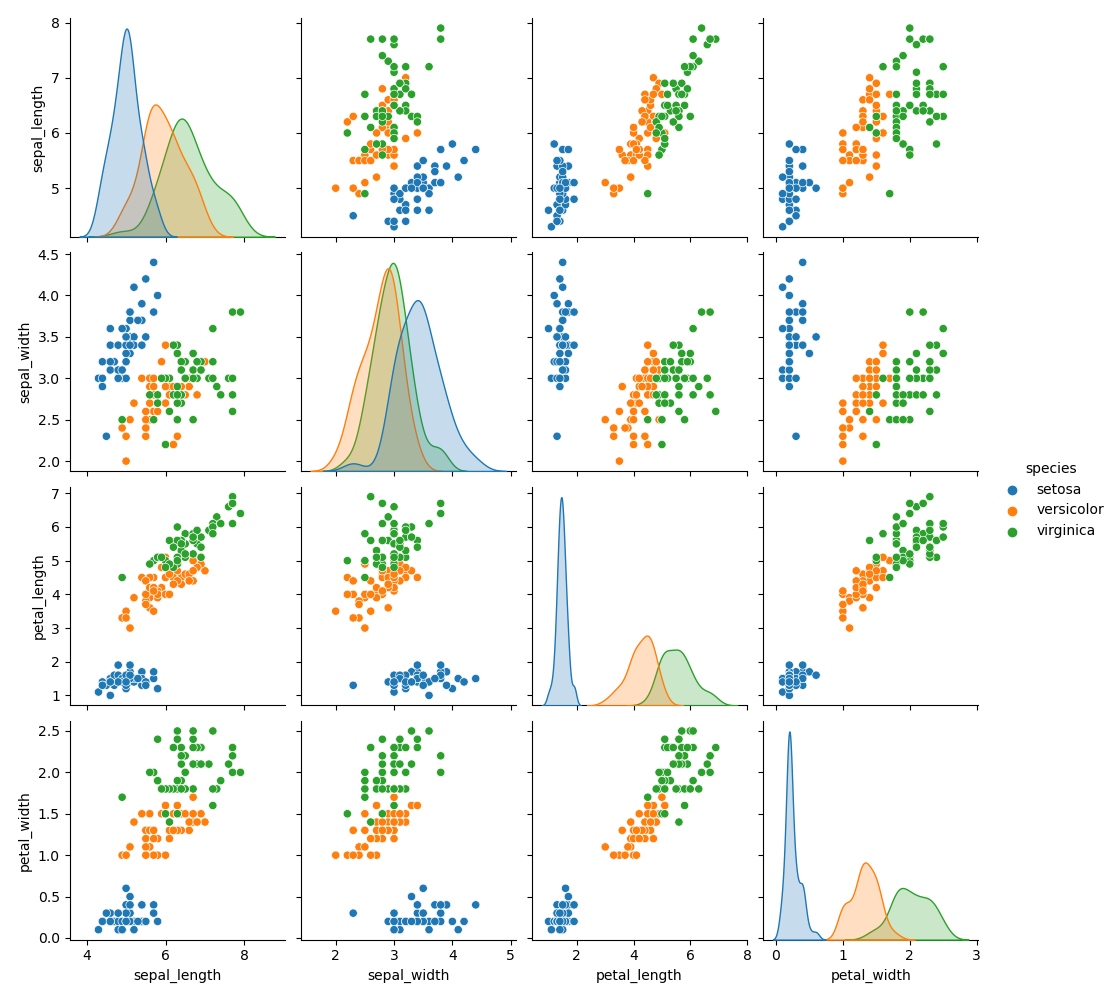

C:\Users\seksc\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


In [3]:
from seaborn import load_dataset
iris = load_dataset("iris")
iris.head()
sns.pairplot(iris, kind="scatter", hue = "species")

plt.show()

# sns.heatmap(iris.corr(),annot=iris.corr())

> **Zadanie** Wskaż atrybuty najbardziej i najmniej skorelowane

Miara korelacji Pearsona odpowiada na pytanie *$czy$* (w jakim stopniu) dane atrybuty ($x,y$) są od siebie zależne liniowo. Odpowiedzi na pytanie *$jak$* od siebie zależą, udzieli model regresyjny. W tym przypadku będzie badany najprostszy model regresji wielomianowej tj. prosta regresja liniowa. Jej wynikiem jest linia prosta $$\hat y = \hat{f}(x) = w_0 + w_1 \cdot x,$$ która pozwala na oszacowanie wartości atrybutu $y$ na podstawie atrybutu $x$. 

Przykład - tworzenie modelu regresyjnego zależności czwartego atrybutu (petal width) od pierwszego (sepal length). Metoda `iloc` umożliwia odwołanie do elementów ramki danych przez ich indeksy, `values` konwertuje wynikową ramkę danych na postać wektora, `reshape` zamienia wektor na macierz o jednej kolumnie. `T` oznacza transpozycję, dzięki której łatwiej zmieścić wydruk w oknie.

In [4]:
x = iris.iloc[:,0].values.reshape(-1,1)
y = iris.iloc[:,3].values.reshape(-1,1)
print(x.T)
print(y.T)

[[5.1 4.9 4.7 4.6 5.  5.4 4.6 5.  4.4 4.9 5.4 4.8 4.8 4.3 5.8 5.7 5.4 5.1
  5.7 5.1 5.4 5.1 4.6 5.1 4.8 5.  5.  5.2 5.2 4.7 4.8 5.4 5.2 5.5 4.9 5.
  5.5 4.9 4.4 5.1 5.  4.5 4.4 5.  5.1 4.8 5.1 4.6 5.3 5.  7.  6.4 6.9 5.5
  6.5 5.7 6.3 4.9 6.6 5.2 5.  5.9 6.  6.1 5.6 6.7 5.6 5.8 6.2 5.6 5.9 6.1
  6.3 6.1 6.4 6.6 6.8 6.7 6.  5.7 5.5 5.5 5.8 6.  5.4 6.  6.7 6.3 5.6 5.5
  5.5 6.1 5.8 5.  5.6 5.7 5.7 6.2 5.1 5.7 6.3 5.8 7.1 6.3 6.5 7.6 4.9 7.3
  6.7 7.2 6.5 6.4 6.8 5.7 5.8 6.4 6.5 7.7 7.7 6.  6.9 5.6 7.7 6.3 6.7 7.2
  6.2 6.1 6.4 7.2 7.4 7.9 6.4 6.3 6.1 7.7 6.3 6.4 6.  6.9 6.7 6.9 5.8 6.8
  6.7 6.7 6.3 6.5 6.2 5.9]]
[[0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 0.2 0.2 0.1 0.1 0.2 0.4 0.4 0.3
  0.3 0.3 0.2 0.4 0.2 0.5 0.2 0.2 0.4 0.2 0.2 0.2 0.2 0.4 0.1 0.2 0.2 0.2
  0.2 0.1 0.2 0.2 0.3 0.3 0.2 0.6 0.4 0.3 0.2 0.2 0.2 0.2 1.4 1.5 1.5 1.3
  1.5 1.3 1.6 1.  1.3 1.4 1.  1.5 1.  1.4 1.3 1.4 1.5 1.  1.5 1.1 1.8 1.3
  1.5 1.2 1.3 1.4 1.4 1.7 1.5 1.  1.1 1.  1.2 1.6 1.5 1.6 1.5 1.3 1.3 1.3
  1.2 1.4 1

Tworzenie modelu regresyjnego.

In [5]:
regressor = LinearRegression()  
regressor.fit(x,y) 

LinearRegression()

Parametrami prostego modelu liniowego $\hat y = \hat{f}(x) = w_0 + w_1 \cdot x$ są $w_0$ (intercept) oraz $w_1$ (slope). W naszym modelu są one równe odpowiednio

In [6]:
# w0
print(regressor.intercept_)
# w1
print(regressor.coef_)

[-3.200215]
[[0.75291757]]


Znając funkcję $\hat{f}(x)$ modelu liniowego możemy dla wektora $x$ wyznaczyć przewidywane wartości $y$, które dla odróżnienia od rzeczywistych zostaną umieszczone w innym wektorze ($y_{pred}$).

In [7]:
y_pred = regressor.predict(x)
y_pred.T

array([[0.63966461, 0.48908109, 0.33849758, 0.26320582, 0.56437285,
        0.86553988, 0.26320582, 0.56437285, 0.11262231, 0.48908109,
        0.86553988, 0.41378933, 0.41378933, 0.03733055, 1.16670691,
        1.09141515, 0.86553988, 0.63966461, 1.09141515, 0.63966461,
        0.86553988, 0.63966461, 0.26320582, 0.63966461, 0.41378933,
        0.56437285, 0.56437285, 0.71495636, 0.71495636, 0.33849758,
        0.41378933, 0.86553988, 0.71495636, 0.94083163, 0.48908109,
        0.56437285, 0.94083163, 0.48908109, 0.11262231, 0.63966461,
        0.56437285, 0.18791406, 0.11262231, 0.56437285, 0.63966461,
        0.41378933, 0.63966461, 0.26320582, 0.79024812, 0.56437285,
        2.07020799, 1.61845745, 1.99491623, 0.94083163, 1.6937492 ,
        1.09141515, 1.54316569, 0.48908109, 1.76904096, 0.71495636,
        0.56437285, 1.24199866, 1.31729042, 1.39258218, 1.01612339,
        1.84433272, 1.01612339, 1.16670691, 1.46787393, 1.01612339,
        1.24199866, 1.39258218, 1.54316569, 1.39

Wizualizacja danych i prostej regresji.

<IPython.core.display.Javascript object>


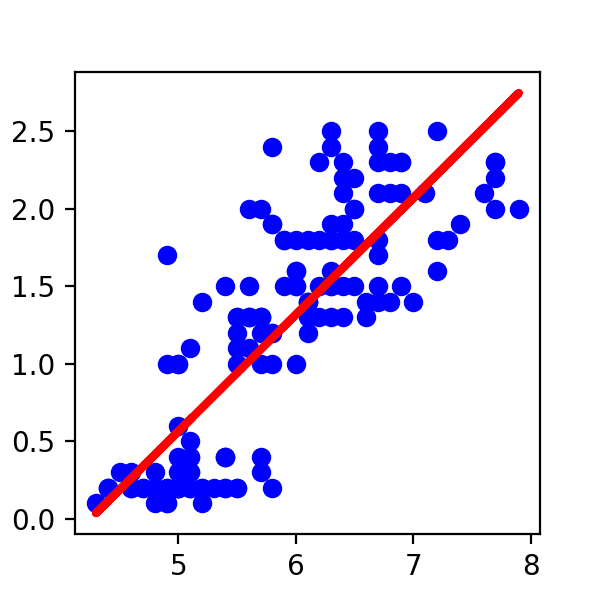

In [8]:
plt.figure(figsize=(3,3), dpi=200)
plt.scatter(x, y,  color='blue')
plt.plot(x, y_pred, color='red', linewidth=3)
plt.show()

Jakość modelu możemy ocenić wykorzystując np. bład średniokwadratowy: 

In [9]:
e = metrics.mean_squared_error(y, y_pred)
e

0.19101500769427363

> **Zadanie** Napisz funkcję, która zwróci parametry $w_0$ oraz $w_1$ modelu prostej regresji liniowej oraz $e$ wartość błędu średniokwadratowego dopasowania. Argumentem będzie ramka danych oraz numery dwóch atrybutów.

In [10]:
def func(df, atr1, atr2):
    
    x = df.iloc[:,atr1].values.reshape(-1,1)
    y = df.iloc[:,atr2].values.reshape(-1,1)
    regressor = LinearRegression()  
    regressor.fit(x,y) 
    w0 = regressor.intercept_[0]
    w1 = regressor.coef_[0][0]
    y_pred = regressor.predict(x)
    e = metrics.mean_squared_error(y, y_pred)
    return w0, w1, e



> **Zadanie** Korzystając z powyższej funkcji oceń modele regresyjne dla poszczególnych par atrybutów. Dla których par błąd dopasowania (obciążenie / bias) modelu jest największa, a dla których - najmniejsza. Czy można zauważyć zależność tej miary od miary korelacji ?

In [12]:
wyniki = []
for i in range(4):
    for j in range(4):
        if i != j:
            wyniki.append((i,j,func(iris, i, j)))
wyniki.sort(key=lambda x: x[2][0])
wyniki



[(0, 2, (-7.101443369602455, 1.8584329782548412, 0.7430610341321241)),
 (0, 3, (-3.2002150046491913, 0.7529175706758456, 0.19101500769427363)),
 (2, 3, (-0.3630755213190291, 0.41575541635241153, 0.04206730919499318)),
 (3, 2, (1.0835580328505112, 2.229940495121864, 0.22563168777869236)),
 (1, 3, (3.1568722857062106, -0.6402765871258865, 0.49976926485227013)),
 (3, 1, (3.3084255580651947, -0.209359831627455, 0.1634162661041927)),
 (0, 1, (3.418946836103816, -0.061884797964144145, 0.1861043758938136)),
 (2, 1, (3.4548744766780657, -0.10578529625990743, 0.1540725768226813)),
 (2, 0, (4.306603415047579, 0.40892227735118536, 0.16350022510554504)),
 (3, 0, (4.777629415601567, 0.8885802538063644, 0.22543259797409776)),
 (1, 0, (6.526222550894481, -0.22336106112989984, 0.6717073053166401)),
 (1, 2, (9.063150606211906, -1.7352215240553546, 2.5272893400281986))]

In [26]:
# Widac ze dla atrybutow sepal_length i petal_length jest najmniejszy blad dopasowania
# natomiast dla atrybutow sepal_width i petal_length jest najwiekszy blad dopasowania


# 3. Błąd uczenia i generalizacji

Sprawdzenie skuteczności modelu regresyjnego wymaga wcześniejszego podziału referencyjnego zbioru danych na (w najprostszym przypadku) dwa podzbiory: uczący i testowy. Pierwszy jest wykorzystywany do wyznaczeniu parametrów modelu regresyjnego, drugi - do testowania modelu. Błąd predykcji dla zbioru uczącego to błąd uczenia, określający stopień dopasowania modelu do znanych danych. Błąd predykcji dla zbioru testowego pokazuje przydatność modelu do przewidywania dla danych, które nie zostały wykorzystane w procesie uczenia. Pokazuje on na ile model jest ogólny tzn. sprawdza się dla dowolnych danych i dlatego jest nazywany błędem generalizacji.

Zbiór `dane10` zawiera dane charakteryzujące się dwoma atrybutami opisującymi (cechami) należące do trzech klas. Każda klasa definiuje jeden podzbiór danych. Podzbiory te wykorzystamy do badania modeli regresyjnych.

<IPython.core.display.Javascript object>


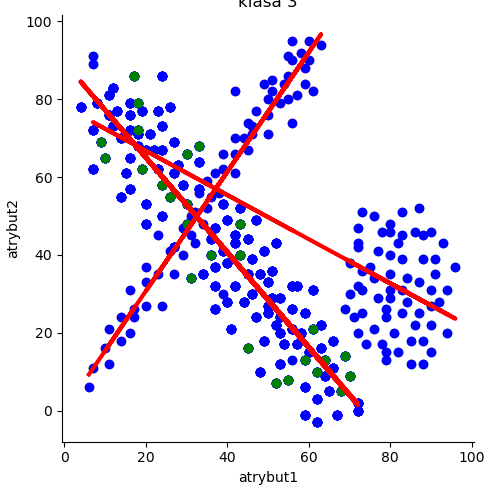

C:\Users\seksc\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


In [13]:
d = pd.read_csv('data/dane10.csv')
sns.lmplot( x="atrybut1", y="atrybut2", data=d, fit_reg=False, hue='klasa', legend=False)
plt.show()

Wybieramy podzbiór `klasa 3` i generujemy modeli liniowy.

In [18]:
dd = d[d.klasa == 'klasa 3']
x = dd.iloc[:,0].values.reshape(-1,1)
y = dd.iloc[:,1].values.reshape(-1,1)
print(x.T)
print(y.T)

[[61 66 69 72 62 62 59 55 52 48 45 37 40 41 34 37 31 27 20 14  7  4 17 26
  33 43 47 52 57 63 70 72 67 59 53 59 56 49 51 49 47 46 45 43 40 36 37 33
  30 24 30 36 39 33 18 24 30 27 23 16  7 10 20  9 15 24 12 16 19 24 29 26
  21 18 20 16 16 11 11  8 12 14 18 13 18 16 19 23 22 28 27 24 68 64 64 66
  65 63 59 62 61 58 60 57 56 56 51 53 53 50 48 45 43 42 42 40 39 37 42 44
  46 50 50 52 53 54]]
[[31 18 14  2 -3  3 -1  8  7 10 16 32 28 21 35 26 34 42 48 55 62 78 86 78
  68 52 49 43 32 22  9  0 -1  6 12 25 32 18 36 41 24 39 44 48 49 40 47 64
  53 50 48 44 53 57 79 73 66 69 77 57 72 65 53 69 61 86 83 79 77 67 58 55
  71 68 67 72 76 76 81 79 73 70 71 77 72 65 62 62 67 63 61 58  5  9 13 11
   5 16 13 10 21 20 15 17 21 26 29 24 29 33 35 35 40 45 43 38 41 37 32 28
  30 27 25 22 20 17]]


In [19]:
#%matplotlib inline
regressor = LinearRegression()  
regressor.fit(x,y) 
y_pred = regressor.predict(x)

plt.scatter(x, y,  color='blue')
plt.plot(x, y_pred, color='red', linewidth=3)
plt.show()


> **Zadanie** Obejrzyj modele dla podzbiorów należących do innych klas. Zwróć szczególną uwage na klasę nr 1.

In [20]:
for i in range(3):
    klasa = i+1
    dd = d[d.klasa == f'klasa {klasa}']
    x = dd.iloc[:,0].values.reshape(-1,1)
    y = dd.iloc[:,1].values.reshape(-1,1)

    regressor = LinearRegression()  
    regressor.fit(x,y) 
    y_pred = regressor.predict(x)

    plt.scatter(x, y,  color='blue')
    plt.plot(x, y_pred, color='red', linewidth=3)
    plt.title(f'klasa {klasa}')
    plt.show()

Badanie modeli regresyjnych z podziałem na zbiór uczący i testowy

In [21]:
x_ucz, x_test, y_ucz, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [22]:
regressor = LinearRegression()  
regressor.fit(x_ucz,y_ucz) 
y_pred_ucz = regressor.predict(x_ucz)
e_ucz = metrics.mean_squared_error(y_ucz, y_pred_ucz)
y_pred_test = regressor.predict(x_test)
e_test = metrics.mean_squared_error(y_test, y_pred_test)
plt.scatter(x_ucz, y_ucz, color='blue')
plt.scatter(x_test, y_test, color='green')
plt.plot(x_ucz, y_pred_ucz, color='red', linewidth=3)
plt.show()
print('błąd uczenia',e_ucz)
print('błąd generalizacji',e_test)

błąd uczenia 97.90961693115158
błąd generalizacji 109.05710100604452


> **Zadanie** Zbadaj błąd uczenia i generalizacji dla wszystkich trzech klas, dla każdej kilkukrotnie powtarzając podział zbioru na uczący i testowy. Oceń stabilość modeli tj. zmienność parametrów modelu dla różnych podziałów. Dla których klas uzyskane modele są bardziej, a dla których - mniej stabilne? Dlaczego?

In [26]:
wyniki = []
for i in range(3):
    for proba in range(1, 5):
        klasa = i+1
        dd = d[d.klasa == f'klasa {klasa}']
        x = dd.iloc[:,0].values.reshape(-1,1)
        y = dd.iloc[:,1].values.reshape(-1,1)
        test_size = 0.1*proba
        x_ucz_k, x_test_k, y_ucz_k, y_test_k = train_test_split(x, y, test_size=test_size, random_state=klasa)
        regressor = LinearRegression()  
        regressor.fit(x_ucz_k,y_ucz_k) 
        y_pred_ucz_k = regressor.predict(x_ucz_k)
        e_ucz_k = metrics.mean_squared_error(y_ucz_k, y_pred_ucz_k)
        y_pred_test_k = regressor.predict(x_test_k)
        e_test_k = metrics.mean_squared_error(y_test_k, y_pred_test_k)
        wyniki.append((klasa, round(test_size,2), e_ucz_k, e_test_k))
        # plt.scatter(x_ucz_k, y_ucz_k, color='blue')
        # plt.scatter(x_test_k, y_test_k, color='green')
        # plt.plot(x_ucz_k, y_pred_ucz_k, color='red', linewidth=3)
        # plt.show()
print('Klasa, Rozmiar testowy, błąd uczenia, błąd generalizacji')

wyniki
    

Klasa, Rozmiar testowy, błąd uczenia, błąd generalizacji


[(1, 0.1, 161.8097546143601, 62.95301918402223),
 (1, 0.2, 157.46975060274795, 145.04445343645057),
 (1, 0.3, 163.81687397317464, 133.16566278366903),
 (1, 0.4, 188.2284470950067, 102.43550101716205),
 (2, 0.1, 42.851989401658344, 20.34998249936447),
 (2, 0.2, 25.047016662503548, 101.8608311809229),
 (2, 0.3, 26.405874734089217, 72.9903679521765),
 (2, 0.4, 28.412429729250373, 60.75545283582706),
 (3, 0.1, 92.8515735472925, 165.31767251948693),
 (3, 0.2, 95.59539908650919, 119.84136631554688),
 (3, 0.3, 92.877354328009, 120.567886765769),
 (3, 0.4, 97.99644180480513, 105.74279669560356)]

In [ ]:
# Random state ustawiony na numer klasy, żeby dane były podzielone w taki sam sposób
[(1, 0.1, 161.80975461436012, 62.95301918402215),
 (1, 0.2, 157.46975060274792, 145.0444534364506),
 (1, 0.3, 163.81687397317464, 133.16566278366903),
 (1, 0.4, 188.22844709500671, 102.43550101716203),
 (2, 0.1, 42.851989401658344, 20.34998249936447),
 (2, 0.2, 25.047016662503555, 101.86083118092291),
 (2, 0.3, 26.405874734089217, 72.9903679521765),
 (2, 0.4, 28.41242972925037, 60.755452835827036),
 (3, 0.1, 92.8515735472925, 165.317672519487),
 (3, 0.2, 95.59539908650919, 119.84136631554688),
 (3, 0.3, 92.87735432800899, 120.56788676576906),
 (3, 0.4, 97.99644180480513, 105.74279669560356)]

# 4. Estymacja parametrów regresji wielomianowej

W przypadku regresji liniowej linia trendu jest linią prostą - jest to szczególny, najprostszy przypadek. W przypadku ogólnym jest to krzywa opisana wielomianem. Współczynniki tego wielomianu mogą być wyznaczane z wykorzystaniem pseudoinwersji, która w efekcie swojego działania minimalizuje sumę kwadratów błędu aproksymacji lub poprzez metody iteracyjnej optymalizacji. Zostało to opisane we wprowadzeniu. Celem tej części laboratorium będzie napisanie programu, który pozwoli na wyznaczenie linii trendu dla punktów zebranych interaktywnie z wykresu. Aproksymatorem będzie w tym przypadku model regresji wielomianowej.  

> **Zadanie** Przy pomocy poniższego kodu wskaż 20 punktów klikając na wykresie tak, by układały się w linię trendu. W efekcie wykonanie poniższego kodu i zebrania punktów otrzymamy ramkę danych z kolumnami x i y. 

<IPython.core.display.Javascript object>


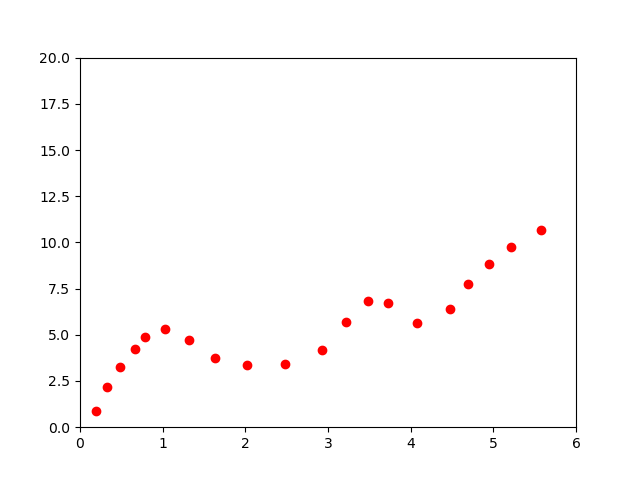

In [27]:
%matplotlib notebook

ile_probek = 20
ile_razy_wiecej = 0
fig = plt.figure()
ax = fig.add_subplot(111)
ax.axis([0, 6, 0, 20])

xx = []
yy = []
df = []

def onclick(event):
    global xx, yy, df
    ix, iy = event.xdata, event.ydata
    print( 'x = %d, y = %d'%(ix, iy))
    ax.plot(ix,iy,'ro')
    xx.append(ix)
    yy.append(iy)
    if len(xx) == ile_probek:
        fig.canvas.mpl_disconnect(cid)
        if (ile_razy_wiecej > 0):
            xx_org = xx
            yy_org = yy
            for i in range(1,ile_razy_wiecej):
                print(i)
                xx = np.concatenate((xx,xx_org+np.random.rand(len(xx_org))/2),axis=0)
                yy = np.concatenate((yy,yy_org+np.random.rand(len(yy_org))/2),axis=0)                
        df = pd.DataFrame({'x': xx, 'y': yy})
cid = fig.canvas.mpl_connect('button_press_event', onclick)

W efekcie udało się pozyskać następującą macierz (ramkę) danych:

In [28]:
print(df.info())
df.head(ile_probek)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       20 non-null     float64
 1   y       20 non-null     float64
dtypes: float64(2)
memory usage: 452.0 bytes
None


,x,y
0,0.193170,0.875778
1,0.326235,2.174479
2,0.483493,3.256730
3,0.664945,4.230756
4,0.785912,4.880107
5,1.027848,5.313007
6,1.318170,4.717769
7,1.632686,3.743743
8,2.019783,3.364955
9,2.479461,3.419068


<IPython.core.display.Javascript object>


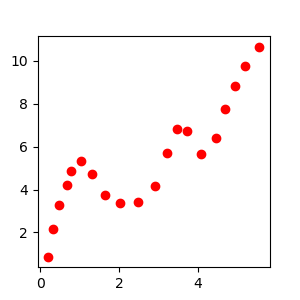

In [29]:
plt.figure(figsize=(3,3))
plt.scatter(df.x, df.y, color='red')
plt.show()

> **Zadanie** Napisz funkcję, która utworzy nam macierz $X$. Macierz $X$ powinna składać się z wektora jednostkowego oraz wektorów zawierających poszczególne potęgi zebranych argumentów (opis we wprowadzeniu). Funkcja ta może tworzyć macierz wykorzystując jako parametr wejściowy stopień wielomianu, którym będziemy chcieli dokonywać aproksymacji.

In [40]:
def create_X_matrix(deg, data):
    n = len(data)
    X = np.zeros((n, deg + 1))

    for i in range(n):
        for j in range(deg+1):
            X[i, j] = data.iloc[i, 0] ** j

    return X  

In [43]:
print(create_X_matrix(3, df))


[[1.00000000e+00 1.93170363e-01 3.73147891e-02 7.20811135e-03]
 [1.00000000e+00 3.26234879e-01 1.06429196e-01 3.47209160e-02]
 [1.00000000e+00 4.83492944e-01 2.33765426e-01 1.13023934e-01]
 [1.00000000e+00 6.64944556e-01 4.42151263e-01 2.94006076e-01]
 [1.00000000e+00 7.85912298e-01 6.17658141e-01 4.85425129e-01]
 [1.00000000e+00 1.02784778e+00 1.05647106e+00 1.08589144e+00]
 [1.00000000e+00 1.31817036e+00 1.73757311e+00 2.29041737e+00]
 [1.00000000e+00 1.63268649e+00 2.66566518e+00 4.35219553e+00]
 [1.00000000e+00 2.01978327e+00 4.07952444e+00 8.23975520e+00]
 [1.00000000e+00 2.47946069e+00 6.14772529e+00 1.52430432e+01]
 [1.00000000e+00 2.92704133e+00 8.56757095e+00 2.50776343e+01]
 [1.00000000e+00 3.21736391e+00 1.03514305e+01 3.33043190e+01]
 [1.00000000e+00 3.48349294e+00 1.21347231e+01 4.22712222e+01]
 [1.00000000e+00 3.72542843e+00 1.38788170e+01 5.17045393e+01]
 [1.00000000e+00 4.07623488e+00 1.66156908e+01 6.77294583e+01]
 [1.00000000e+00 4.47542843e+00 2.00294596e+01 8.964041

> **Zadanie** Przy pomocy funkcji pakietu _numpy_ wyliczającej pseudoinwersję _np.linalg.pinv()_ oraz mnożenia macierzy _np.dot()_ wylicz parametry modelu dla zbioru uczącego.

In [52]:
import numpy as np

def my_polyfit(data, degree):
    X_matrix = create_X_matrix(degree, data)
    pseudo_array = np.linalg.pinv(X_matrix) 
    model_params = np.dot(pseudo_array, data.y)
    return np.flip(model_params)

print(my_polyfit(df, 3))

[ 0.16098816 -1.15399934  3.11345862  1.77479613]


> **Zadanie** 
1. Wyświetl na pojedynczym wykresie, punkty danych oraz linie trendów dla wielomianów stopnia 1, 2, 3, 4 i 5.
2. Wyświetl wykres średniokwadratowego błędu dopasowania krzywej do punktów danych, w funkcji złożoności modelu (stopnia wielomianu). Czym się ta funkcja charakteryzuje ?


<IPython.core.display.Javascript object>


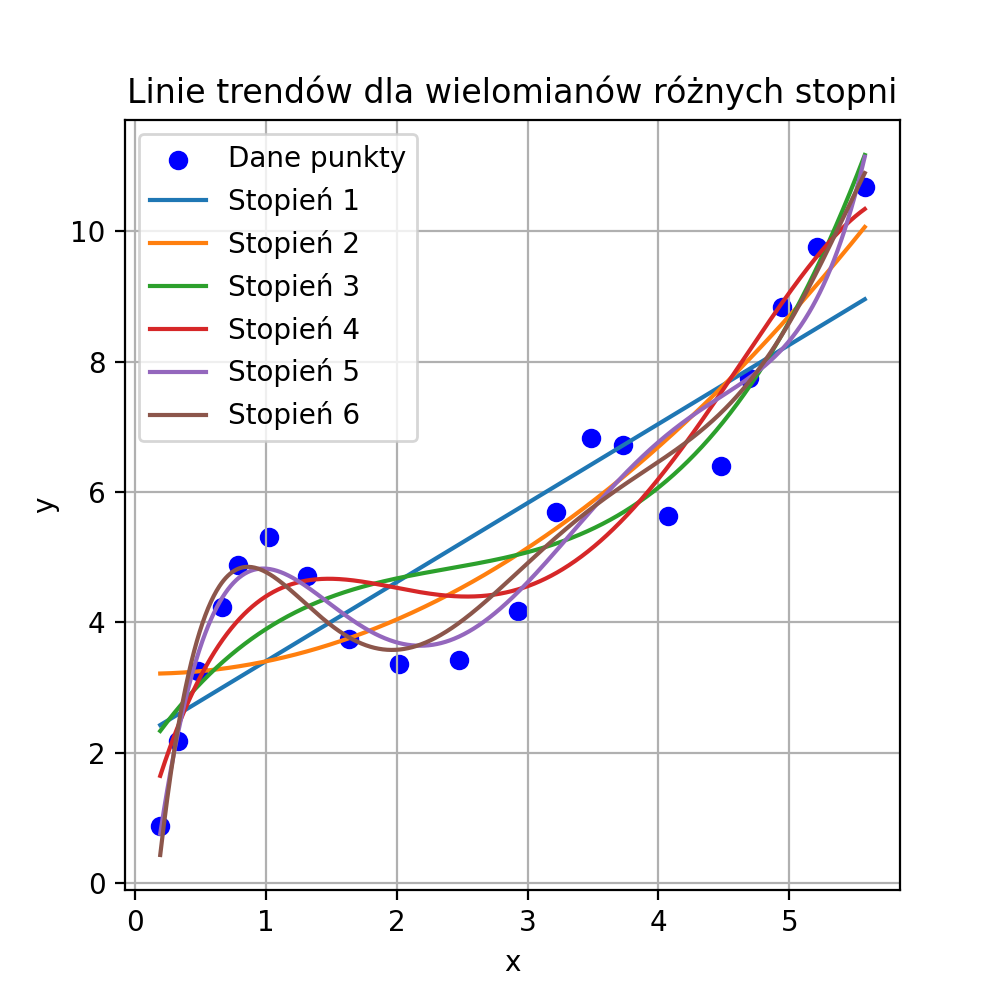

In [98]:
# Stopnie wielomianów
degrees = [1, 2, 3, 4, 5, 6]
x = df.x
y = df.y
# Rysowanie punktów danych
plt.figure(figsize=(5,5), dpi=200)
plt.scatter(x, y, label="Dane punkty", color='b')

# Dla każdego stopnia wielomianu, oblicz współczynniki i rysuj linię trendu
for degree in degrees:
    coefficients = my_polyfit(df, degree)
    polynomial = np.poly1d(coefficients)
    new_x = np.linspace(x.min(), x.max(), 1001)
    y_fit = polynomial(new_x)
    label = f"Stopień {degree}"
    plt.plot(new_x, y_fit, label=label)

plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linie trendów dla wielomianów różnych stopni")
plt.grid(True)
plt.show()



<IPython.core.display.Javascript object>


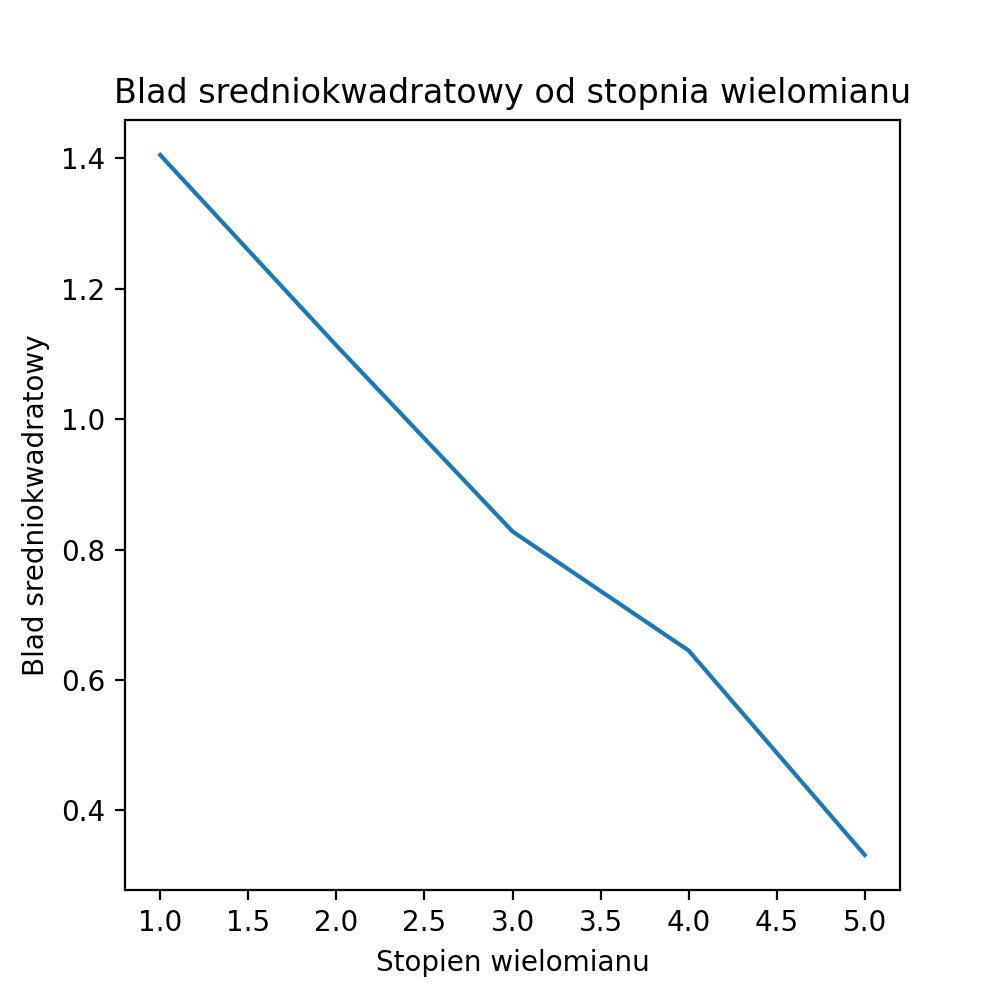

In [85]:
%matplotlib notebook


# Funkcja do obliczania bledu sredniokwadratowego w zaleznosci od stopnia wielomianu
def mse(degree):
    p = my_polyfit(df, degree)
    y_pred = np.polyval(p, x)
    return np.mean((y - y_pred) ** 2)

# Calculate the mean square error for each polynomial degree
mse_values = [mse(d) for d in degrees]

# Plot the mean square error as a function of polynomial degree
plt.figure(figsize=(5,5), dpi=200)
plt.plot(degrees, mse_values)
plt.xlabel('Stopien wielomianu')
plt.ylabel('Blad sredniokwadratowy')
plt.title('Blad sredniokwadratowy od stopnia wielomianu')
plt.show()


In [ ]:
# Funkcja charakteryzuje sie tym ze wraz ze wzrostem stopnia wielomianu 
# blad sredniokwadratowy maleje czyli model jest lepiej dopasowany

> **Zadanie** Zajdź funkcię wbudowaną pakietu `numpy`, która zwraca wartości współczynników wielomianu dla zadanych punktów (czyli realizuje to co powyżej udało się zrobić "ręcznie").

In [33]:
coefficients = np.polyfit(df.x, df.y, 3)
coefficients

array([ 0.16098816, -1.15399934,  3.11345862,  1.77479613])

> **Zadanie** Podziel zbiór na uczacy i testowy, a następnie powtórz wcześniejszy eksperyment z uwzględnieniem tego podziału. W szczególności: 
1. Wyświetl na pojedynczym wykresie, punkty danych oraz linie trendów dla wielomianów kilku wybranych stopni wyznaczonych dla zbioru uczącego.
2. Wyświetl wykres błędu uczenia (tj. dopasowania punktów zbioru uczącego) i generalizacji (tj. dopasowania punktów zbioru testowego) w funkcji złożoności modelu (stopnia wielomianu).
3. Wybierz stopień wielomianu, który najlepiej opisuje Twoje punkty danych z uwzględnieniem podziału na zbiór uczący i testowy. Co należy uwzględnić dokonując takiego wyboru ?

In [95]:
x_ucz, x_test, y_ucz, y_test = train_test_split(df.x, df.y, test_size=0.2, random_state=0)
data_ucz = pd.DataFrame({'x': x_ucz, 'y': y_ucz})
data_test = pd.DataFrame({'x': x_test, 'y': y_test})

<IPython.core.display.Javascript object>


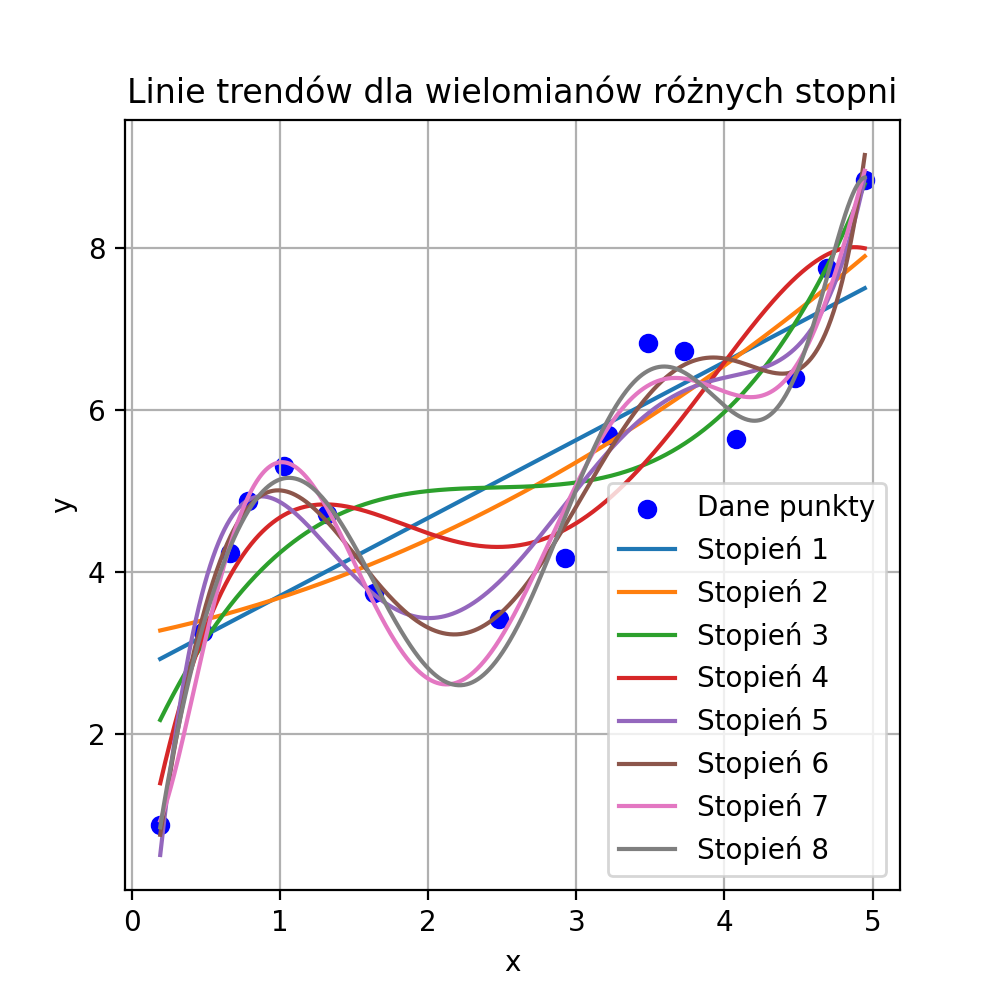

In [103]:
# Stopnie wielomianów
degrees = np.arange(1, 9)
x = data_ucz.x
y = data_ucz.y
# Rysowanie punktów danych
plt.figure(figsize=(5,5), dpi=200)
plt.scatter(x, y, label="Dane punkty", color='b')

# Dla każdego stopnia wielomianu, oblicz współczynniki i rysuj linię trendu
for degree in degrees:
    coefficients = my_polyfit(data_ucz, degree)
    polynomial = np.poly1d(coefficients)
    new_x = np.linspace(x.min(), x.max(), 1001)
    y_fit = polynomial(new_x)
    label = f"Stopień {degree}"
    plt.plot(new_x, y_fit, label=label)

plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linie trendów dla wielomianów różnych stopni")
plt.grid(True)
plt.show()

<IPython.core.display.Javascript object>


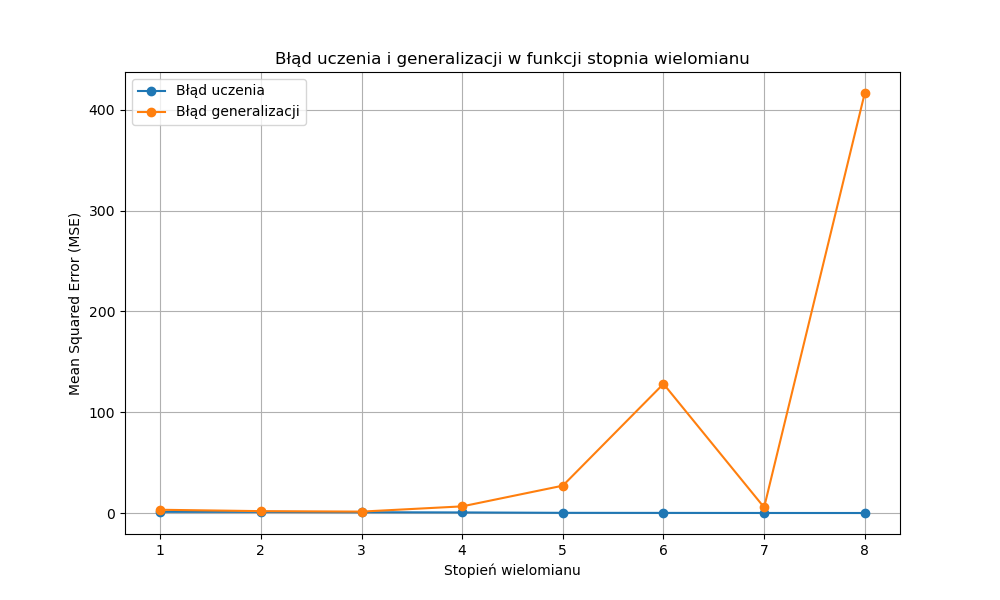

[1.199970252988607, 1.1520868644544566, 0.8403820816936974, 0.6121997580152572, 0.2245492534851941, 0.15774230739862594, 0.08692729769092708, 0.05725179668102633]
[3.2658606457897217, 1.9022529778316164, 1.4391976969619729, 6.63356304973166, 27.177541869321573, 128.19094236821323, 5.639662359949631, 416.7662762847715]


In [104]:

def mean_squared_error(data_y, pred_y):
    return np.mean((data_y - pred_y) ** 2)


train_errors = []
test_errors = []

for degree in degrees:
    # Obliczanie wspolczynnikow regresji wielomianowej dla danych uczacych
    model_params = my_polyfit(data_ucz, degree)
    
    # Utworzenie wielomianu na podstawie wspolczynnikow modelu
    poly_model = np.poly1d(model_params)
    
    # Obliczanie prognoz na danych uczacych
    y_train_pred = poly_model(data_ucz.x)
    train_error = mean_squared_error(data_ucz.y, y_train_pred)
    train_errors.append(train_error)
    
    # Obliczanie prognoz na danych testowych
    y_test_pred = poly_model(data_test.x)
    test_error = mean_squared_error(data_test.y, y_test_pred)
    test_errors.append(test_error)

# Wykres bledu uczenia i generalizacji w funkcji stopnia wielomianu
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_errors, label='Błąd uczenia', marker='o')
plt.plot(degrees, test_errors, label='Błąd generalizacji', marker='o')
plt.title('Błąd uczenia i generalizacji w funkcji stopnia wielomianu')
plt.xlabel('Stopień wielomianu')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.grid(True)
plt.show()
print(train_errors)
print(test_errors)


In [ ]:
# Moim zdaniem najlepszy jest stopien wielomianu 7 poniewaz najlepiej radzi on sobie z podzialem na zbiory uczacy i testowy
# (blad uczenia jest najmniejszy natomiast blad generalizacji jest niewiele wiekszy), nalezy przy tym pamietac ze dane skladaja
# sie tylko z 20 punktow, ale linia trendu na wykresie najlepiej oddaje rzeczywiste punkty z danych
# Aby wybrac stopien wielomiany, ktory najlepiej radzi sobie z podzialem na zbior uczacy i testowy, 
# nalezy wziac pod uwage bledy uczenia i generalizacji oraz czy nie nastapilo nadmierne dopasowanie
# (overfiting) lub niedostosowanie (underfiting)

> **Zadanie** Odpowiedz na następujące pytania sprawdzające:
1. Czy jesteśmy w stanie zminimalizować błąd uczenia do 0, jeśli tak to jaki warunek musi być spełniony?
2. Czy powinniśmy tak dobierać stopień wielomianu aby błąd uczenia był jak najmniejszy?
3. Czy równanie zawsze posiada rozwiązanie przybliżone?
4. Co się dzieje z wielkością parametrów modelu w miarę zwiększania stopnia wielomianu?

In [ ]:
# 1. Zmninimalizowanie bledu uczenia do 0 jest mozliwe, ale oznacza to ze model idealnie dopasowal sie do 
# danych treningowych to skutkuje nadmiernym dopasowaniem (overfiting)
# 2. Niekoniecznie poniewaz to prowadzi do nadmiernego dopasowania, powinnismy dazyc do kompromisu, ktory zapewni odpowiednie
# dopasowanie do danych treningowych i zdolnosci do generalizacji nowych danych
# 3. Rozwiazanie przyblizone jest mozliwe do wyliczenia, minimalizujac blad aproksymacji
# 4. W miare zwiekszania stopnia wielomianu parametry modelu staja sie coraz wieksze, to moze prowadzic do nadmiernego 
# dopasowania (overfiting) do danych treningowych, co prowadzi do bardzo duzych wartosci parametrow i zwiekszonej 
# zlozonosci modelu, ktory moze byc trudny do interpretacji i generalizacji 